# ML üzrə Yekun Tapşırıq
___

Bu tapşırığın tamamlanması üçün aşağıdakılar gərəklidir:
* Verilmiş data üzrə müstəqil şəkildə Exploratory Data Analysis etməyiniz və gərəkli olduğu halda datanı transform etmək (dummy variables, scaling və s.) (**EDA**)
* Dərslər ərzində keçirilmiş Linear Regression metodlarından uyğun olduğunu düşündüyünüz modeli istifadə edib `predicted` (proqnozlaşdırılmış) nəticələri və modelin göstərdiyi performansı analiz etməyiniz (**Modelling**)

Yekun nəticə üzərindəki təsir isə aşağıdakı kimidir:
* **EDA** - 40%
* **Modelling** - 60%

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df = pd.read_csv("Ecommerce Customers.csv")

##  EDA

In [ ]:
mean= []

In [ ]:
bikes.plot(kind='pie', figsize=(10,10), autopct='%0.2f%%', fontsize=8)

In [52]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [194]:
# webpage-də keçirilən vaxt ortalma
df['Time on Website'].mean()

37.060445421080004

In [193]:
# mobil app-da keçirilən vaxt ortalama
df['Time on App'].mean()

12.052487936928012

In [186]:
if df['Time on Website'].sum() == df['Time on App'].sum():
    print("mobil app və ya webpage-də keçirilən vaxt bərabərdir.")
elif df['Time on Website'].sum() >= df['Time on App'].sum():
    print("webpage-də daha çox vaxt keçirilmişdir.")
elif df['Time on Website'].sum() <= df['Time on App'].sum():
    print("mobil app-da daha çox vaxt keçirilmişdir.")

webpage-də daha çox vaxt keçirilmişdir.


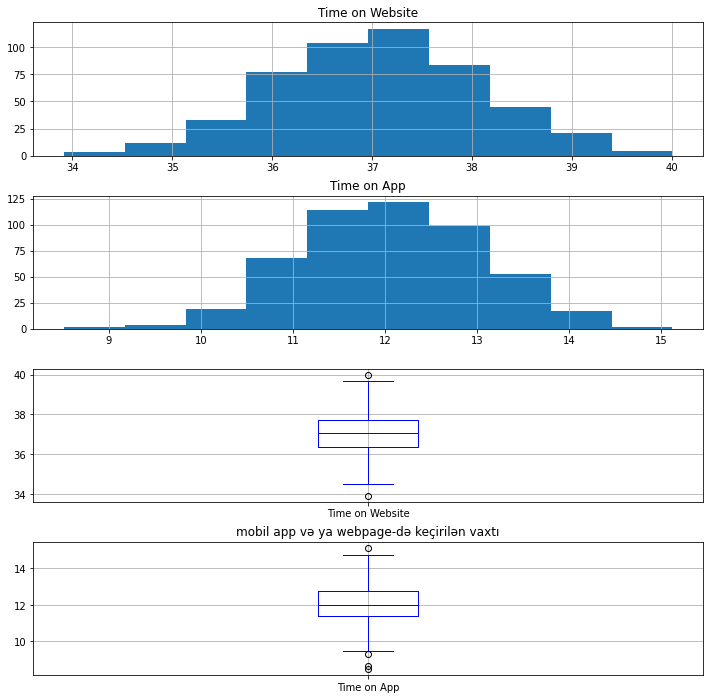

In [187]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(12,12))
df.hist('Time on Website', ax=ax1 )
df.hist('Time on App', ax=ax2 )
df.boxplot(column =['Time on Website'], color='blue',fontsize=10, ax=ax3)
df.boxplot(column =['Time on App'], color='blue',fontsize=10, ax=ax4)
plt.title('mobil app və ya webpage-də keçirilən vaxtı')

plt.show()

# müştərilər daha çox website-da vaxt keçirirlər

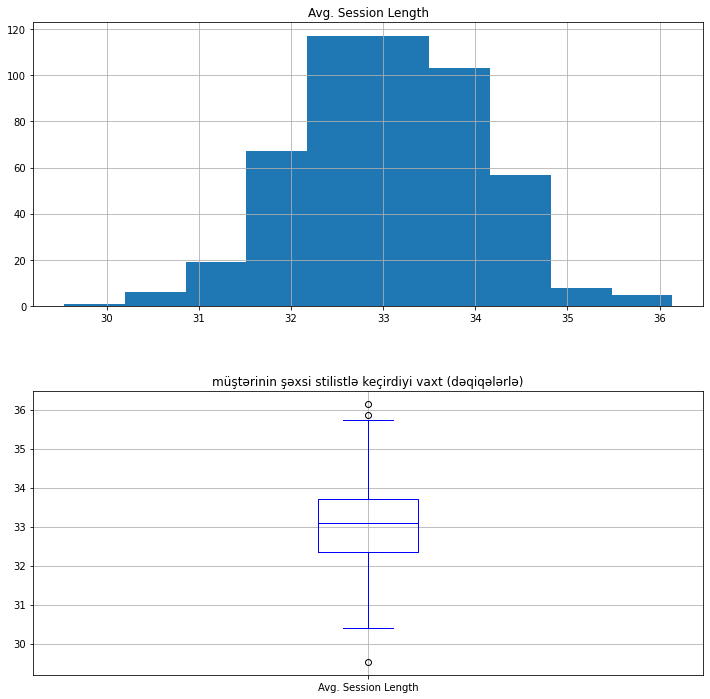

In [171]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(12,12))
df.hist('Avg. Session Length', ax=ax1 )
df.boxplot(column =['Avg. Session Length'], color='blue',fontsize=10, ax=ax2)
plt.title('müştərinin şəxsi stilistlə keçirdiyi vaxt (dəqiqələrlə)')
plt.show()

Text(0.5, 1.0, 'Müştərinin illik alış-veriş xərci (USD) ortalama')

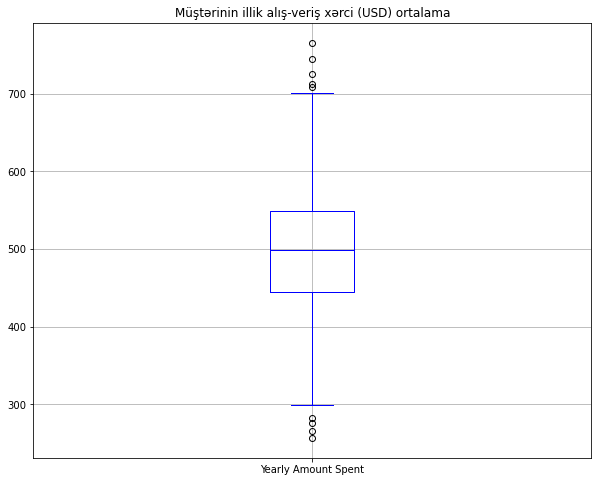

In [182]:
df.boxplot(column =['Yearly Amount Spent'], color='blue',fontsize=10, figsize=(10,8))
plt.title('Müştərinin illik alış-veriş xərci (USD) ortalama')


## Modelling

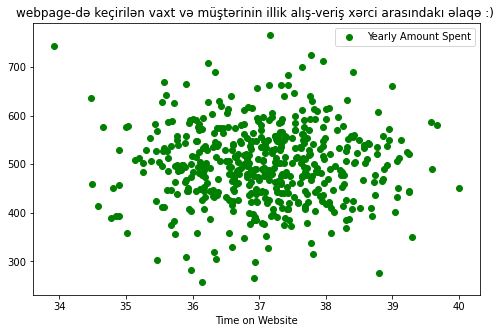

In [151]:
df.plot(x='Time on Website', y='Yearly Amount Spent',style = 'go', figsize = (8,5))
plt.title('webpage-də keçirilən vaxt və müştərinin illik alış-veriş xərci arasındakı əlaqə :) ')
plt.show()

In [98]:
a = df['Time on Website'].values.reshape(-1,1)
b = df['Yearly Amount Spent'].values

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
a_tr, a_test, b_tr, b_test = train_test_split(a, b, test_size= 0.2, random_state=0)

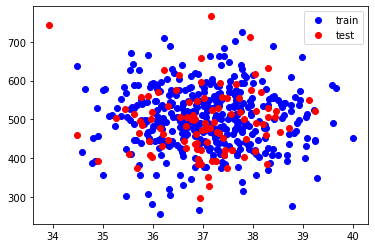

In [101]:
plt.plot(a_tr, b_tr, 'bo', label='train')
plt.plot(a_test, b_test, 'ro', label='test')

plt.legend()

In [102]:
corr = df.corr()

<AxesSubplot:>

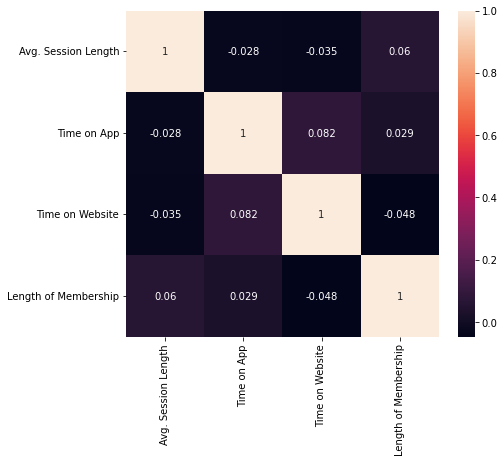

In [103]:
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(corr.iloc[:-1, :-1], ax=ax, annot=True)

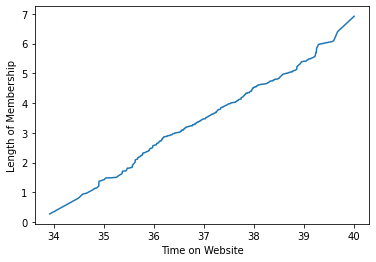

In [111]:
plt.plot(df['Time on Website'].sort_values(), df['Length of Membership'].sort_values())
plt.xlabel('Time on Website')
plt.ylabel('Length of Membership')
plt.show()

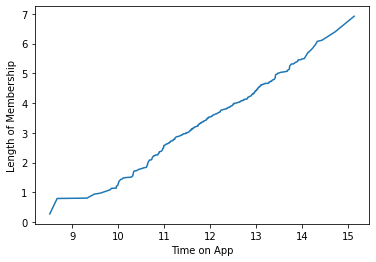

In [110]:
plt.plot(df['Time on App'].sort_values(), df['Length of Membership'].sort_values())
plt.xlabel('Time on App')
plt.ylabel('Length of Membership')
plt.show()

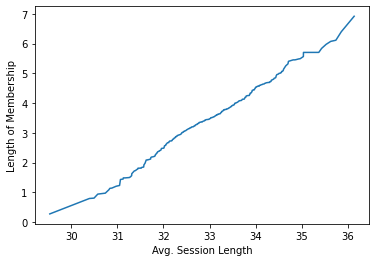

In [123]:
plt.plot(df['Avg. Session Length'].sort_values(), df['Length of Membership'].sort_values())
plt.xlabel('Avg. Session Length')
plt.ylabel('Length of Membership')
plt.show('')

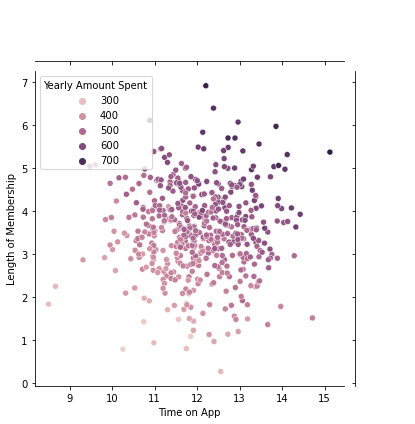

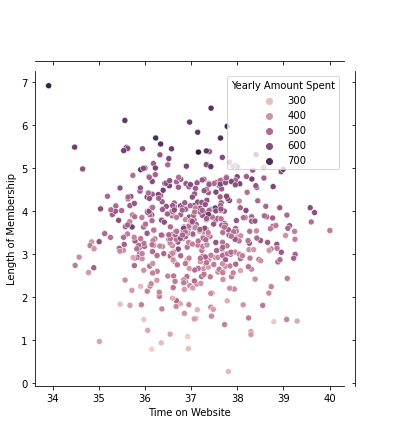

In [202]:
sns.jointplot(data=df, x='Time on App', y='Length of Membership', hue='Yearly Amount Spent')
sns.jointplot(data=df, x='Time on Website', y='Length of Membership', hue='Yearly Amount Spent')
plt.show()


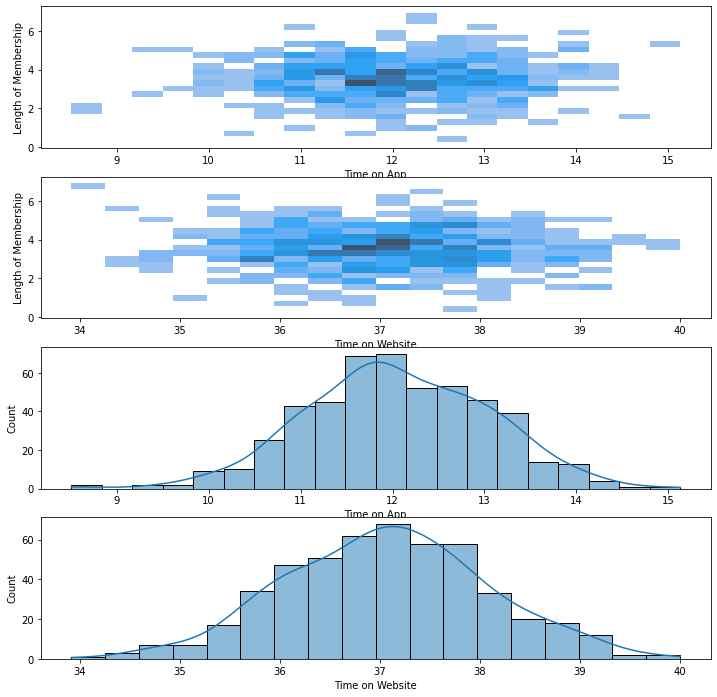

In [203]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, figsize=(12,12))
sns.histplot(data=df, x='Time on App', y='Length of Membership', kde=True, ax=ax1)
sns.histplot(data=df, x='Time on Website', y='Length of Membership', kde=True, ax=ax2)
sns.histplot(df['Time on App'], kde=True, ax=ax3)
sns.histplot(df['Time on Website'], kde=True, ax=ax4)
plt.show()

# mobil app və webpage müştərilərilə üzvlük müddəti arasındakı əlaqə 

In [ ]:
# Müştərilər Website-da daha çox vaxt keçirirlər. Ammma müştərilərin illik alış-veriş xərcinə görə App müştəriləri yüksək yer tutur.

## Data Barədə

Verilmiş data New York şəhərindəki əsas satış məhsulu paltar olan bir Ecommerce şirkətinə aiddir. Bu şirkət məhsullarını online satdığı halda müştərilərə öz satış məntəqələrində stil üzrə məsləhətlər də təklif edir. Müştərilər bu məntəqələrə gələrək şəxsi stilistlə görüşdükdün sonra online şəkildə mobil app və ya webpage-dən istədikləri məhsulları sifariş edirlər. 

**Şirkətin etməyə çalışdığı isə öz resurslarını mobil app və ya webpage-ə doğru yönəltməsinə qərar verməkdir. Bunun üçün müştərilərin bu şirkətdə illik xərclərini predict edə bilən bir model quraraq bu model üçün mobil app və ya webpage-də keçirilən vaxtın hansının daha çox önəm daşıdığını müəyyən etməkdir**

Data aşağıdakı kimidir:

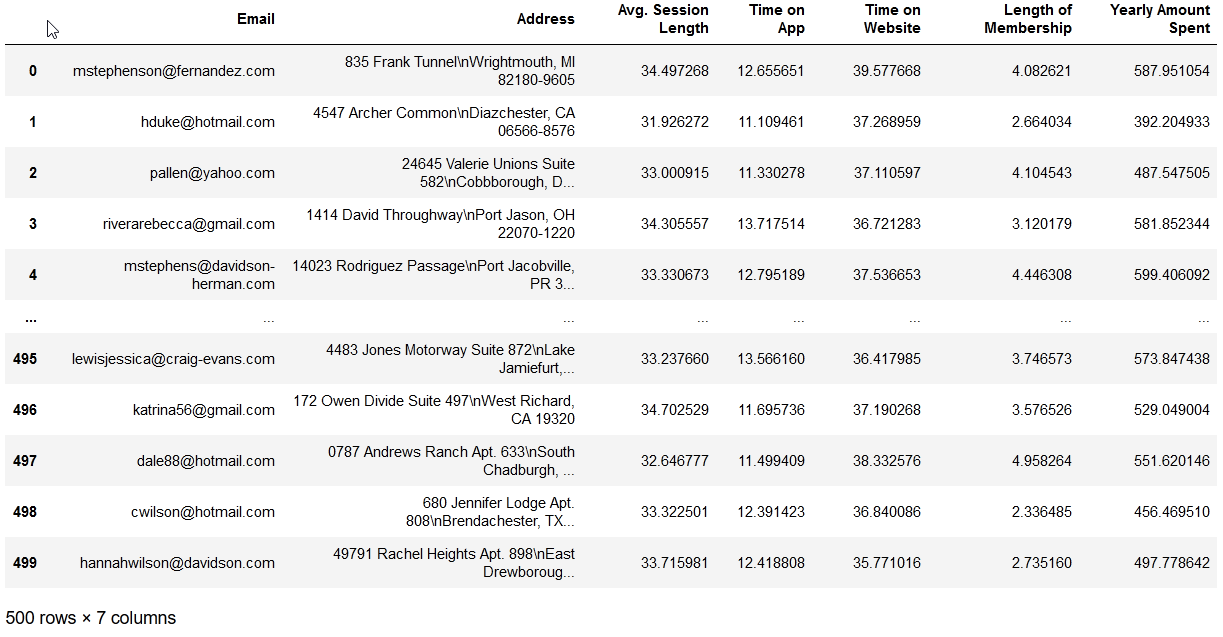


Datada aşağıda gördüyümüz sütunlar vardır:
* `email` - müştərinin email-i
* `Address` - müştərinin adresi
* `Avg. Session Length` - müştərinin şəxsi stilistlə keçirdiyi vaxt (dəqiqələrlə)
* `Time on App` - müştərinin mobil app-də keçirdiyi vaxt (dəqiqələrlə)
* `Time on Website` - müştərinin webiste-da keçirdiyi vaxt (dəqiqələrlə)
* `Length of Membership` - müştərinin satıcı şirkətin online servisinə üzvlük müddəti (illərlə)
* `Yearly Amount Spent` - müştərinin illik alış-veriş xərci (USD)